# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from sklearn.metrics import roc_curve, auc

In [2]:
import seaborn as sns

In [3]:
import xgboost as xgb
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from imblearn.over_sampling import SMOTE


warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

# LOADING THE DATASET

In [5]:
df = pd.read_csv('C:/Users/Akhil/AppData\Local/Programs/Python/Python37/Scripts/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# MISSING VALUES

In [6]:
df.shape

(1470, 35)

In [7]:
null_feat = pd.DataFrame(len(df['Attrition']) - df.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.plot(fig)


'temp-plot.html'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [34]:
# Reassign target
pd.Series(np.where(df.Attrition.values == 'yes', 1, 0),
          df.index)
# Drop useless feat
df = df.drop(columns=['StandardHours', 
                          'EmployeeCount', 
                          'Over18',
                        ])
df2 = df.drop(columns=['EducationField','Department','BusinessTravel'
                        ])


In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [35]:
df2.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,1,2,Female,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,279,8,1,2,3,Male,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,4,4,Male,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,1392,3,4,5,4,Female,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,591,2,1,7,1,Male,40,3,...,3,4,1,6,3,3,2,2,2,2


# DATA ViSUALIZATION

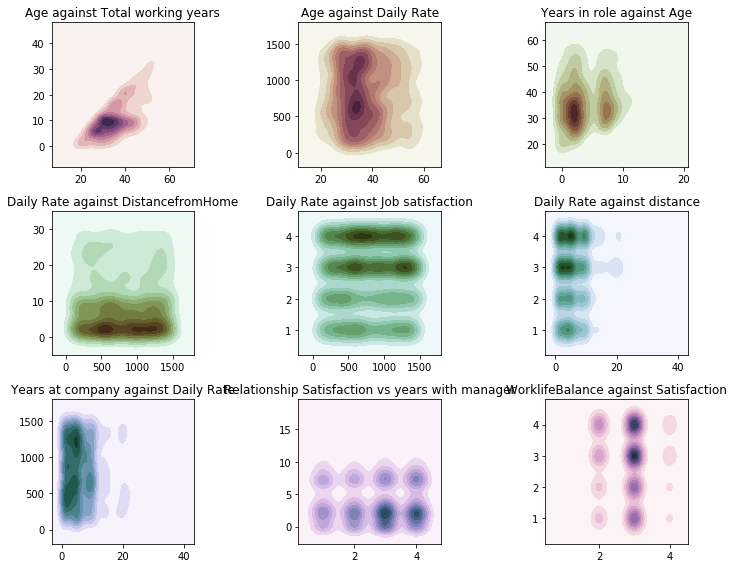

In [36]:
#Plotting KDE plots
f, axes = plt.subplots(3, 3, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = df['Age'].values
y = df['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['Age'].values
y = df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['YearsInCurrentRole'].values
y = df['Age'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y = df['DistanceFromHome'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['DailyRate'].values
y =df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
# Generate and plot
x = df['YearsAtCompany'].values
y =df['DailyRate'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
# Generate and plot
x = df['RelationshipSatisfaction'].values
y = df['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
# Generate and plot
x = df['WorkLifeBalance'].values
y = df['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()


# EXPLORATION

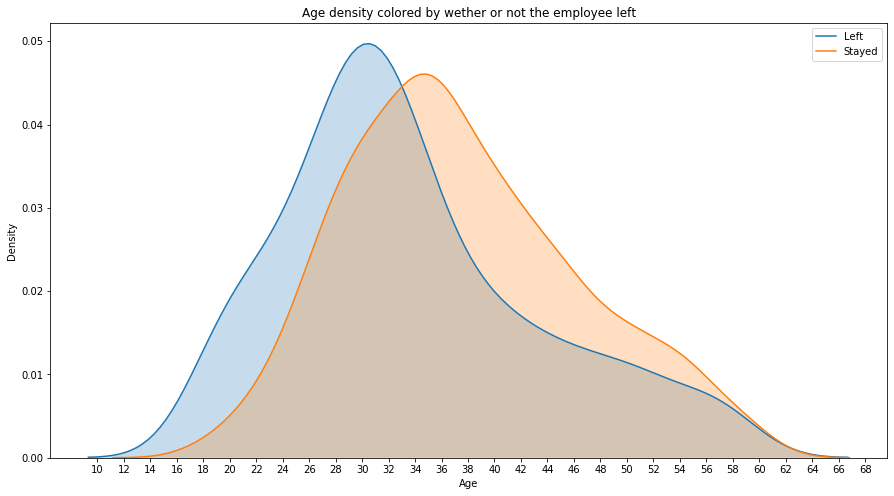

In [86]:
f,ax = plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[df.Attrition == 1, "Age"], shade = True, label = "Left")
sns.kdeplot(df.loc[df.Attrition == 0 , "Age"], shade = True, label = "Stayed")
ax.set(xlabel = "Age", ylabel = "Density",title = "Age density colored by wether or not the employee left")
ax.set_xticks(range(10, 70, 2))
plt.show()

Whats the age distribution on each group?



So it appears younger people tend to leave the company more often which is to be expected since they probably haven't settled on a house/family or they might get more job offerings. This feature is probably a good feature to use in our model


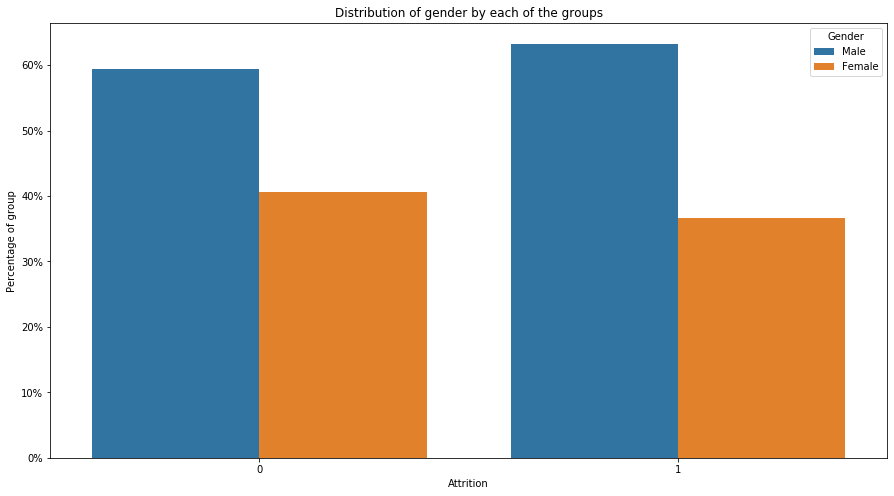

In [18]:
f,ax = plt.subplots(figsize=(15,8))

# Get the proportion of the genders grouped by the attrition status
grouped_data = df["Gender"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()

# Plot the result
sns.barplot(x = "Attrition", y = "Percentage of group", hue = "Gender", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of gender by each of the groups")
plt.show()

Which gender is more likely to leave?

This company has more men the women and so this plot shows us that men tend to leave the company more but only because they're in a larger number.
This also indicates that gender might not be a key factor for employee attrition

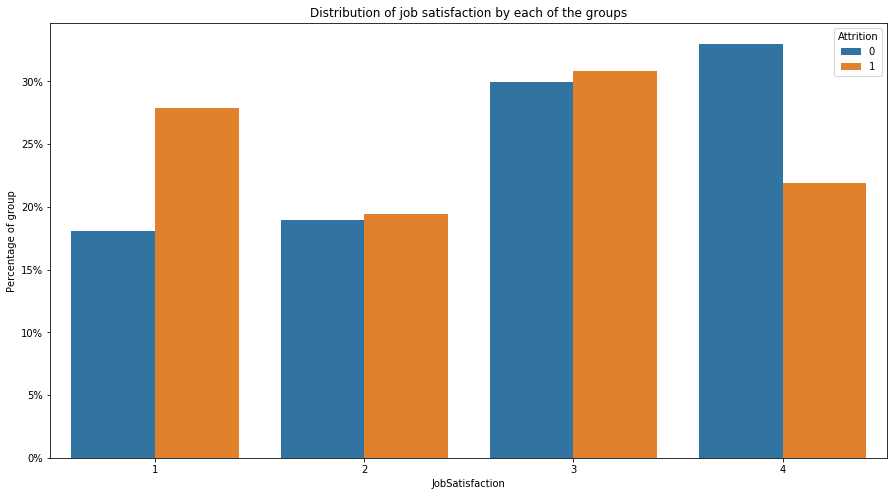

In [20]:
f,ax = plt.subplots(figsize=(15,8))
grouped_data = df["JobSatisfaction"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()
sns.barplot(x = "JobSatisfaction", y = "Percentage of group", hue = "Attrition", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of job satisfaction by each of the groups")
plt.show()

Are leavers more dissatisfied with their jobs?


It appears to be so. Around 27% of people who left the company felt really dissatisfied with their jobs, while only nearly 17% of people who stayed said the same thing.

In contrast people who stay in the company seem to be, in general, satisfied with their jobs.

It's also interesting to see there's a large portion of leavers that have a level 3 of satisfaction. This might be either because of the scoring mechanism (i.e, 3 is a somewhat neutral job statisfaction level) or they're cases where a person does not leave the job because they don't like it but maybe they received a better offer


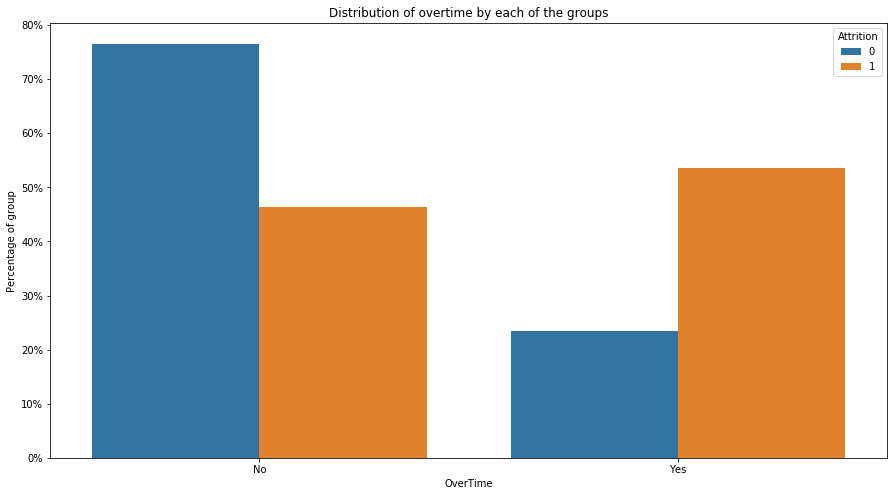

In [21]:
f,ax = plt.subplots(figsize=(15,8))
grouped_data = df["OverTime"].groupby(df["Attrition"]).value_counts(normalize = True).rename("Percentage of group").reset_index()
sns.barplot(x = "OverTime", y = "Percentage of group", hue = "Attrition", data = grouped_data)

# Convert y axis to percentage format
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.set(title = "Distribution of overtime by each of the groups")
plt.show()

Do people who leave tend to have more overtime?


So there's a near 50-50 split in people who leave the company reagarding overtime, meaning some work overtime and some don't.

But the finding we can take from here is that just a small portion (around 27%) of people who stay in the company work overtime. Meaning this might be another usefull feature for our model, if an observation states that a person works overtime we'll be more inclined to say that this person is likely to leave the company (so go ahead and tell your bosses you're not working overtime because you don't want to leave the company (: )

There's many more plots we could make to answer some basic questions like these ones, but these visualizations are only one-dimensional (for each attrition group) so, although they're helpful, we might get some extra information when we see the relation between two or more variables


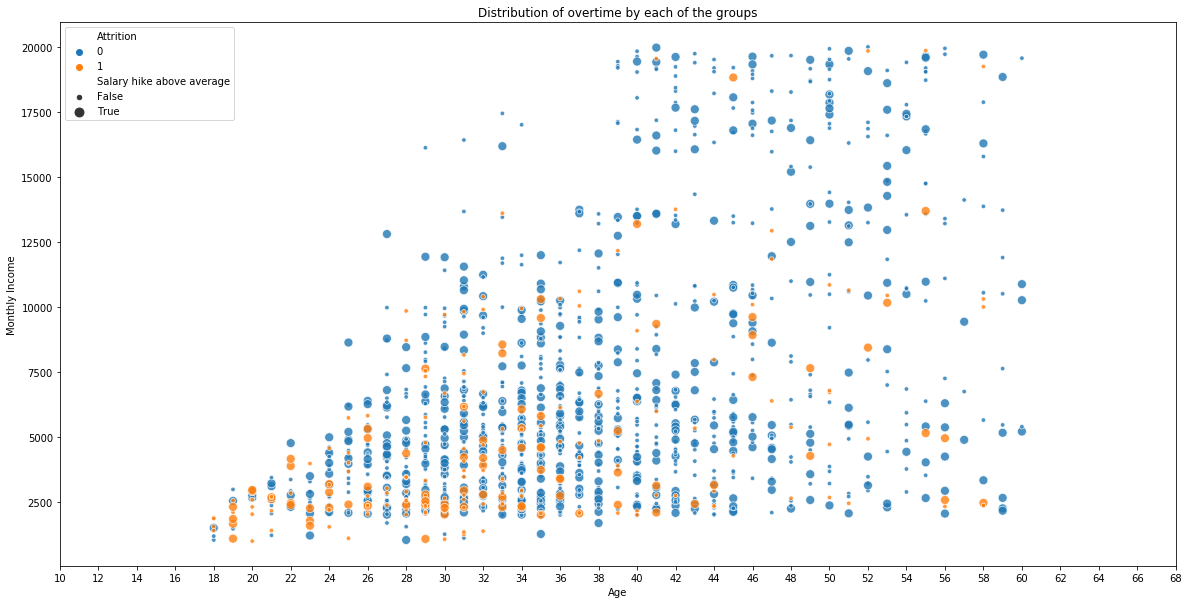

In [22]:
df["Salary hike above average"] = df.PercentSalaryHike > df.PercentSalaryHike.mean()

df_reordered = df.sort_values(by=['Attrition'])

f,ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(x="Age", y="MonthlyIncome", hue="Attrition", size = "Salary hike above average", data=df_reordered, alpha = 0.8, sizes = (80,20))
ax.set(ylabel = "Monthly Income", title = "Distribution of overtime by each of the groups")
ax.set_xticks(range(10, 70, 2))
plt.show()

Age vs monthly income with salary hike controling the size?


This is a good company to be in since everyone got a increase in it's salary, but some received more than others, let's look at what's the relation between the age and the monthly income and let's make the points bigger where a person received a salary hike above the average (which is around 15%)

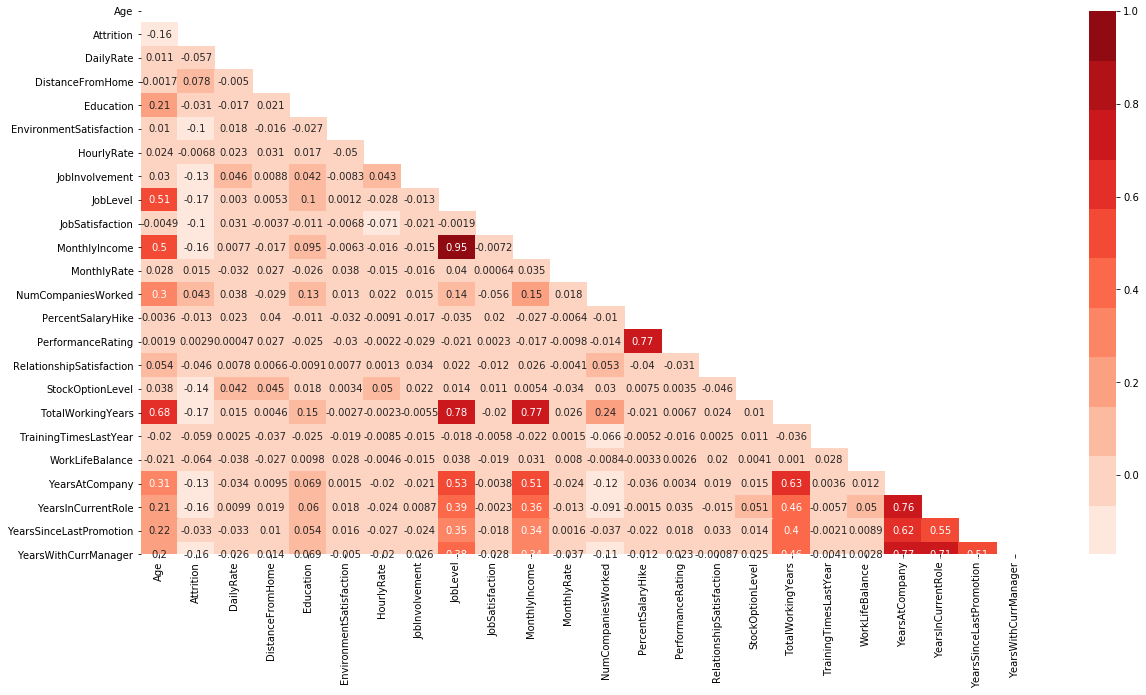

In [24]:
correlation = df.drop(["EmployeeNumber", "Salary hike above average"], axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(20,10))
sns.heatmap(correlation, annot = True, cmap = sns.color_palette("Reds", 11), mask = mask)
plt.show()

This heatmap says alot about the company:

Higher lob levels means higher monthly incomes (which is obvious)

Theres a strong correlation between the number of years at the company and the number of years with a given manager and role, meaning that people in this company don't often change managers/roles

People with higher performance ratings receive higher salary hikes (which is also obvious) but when we contrast this with the previous plot where we say there where a lot of leavers with above average salary hikes, we get the sense that many of our leavers are have a good performance, which aggravates the cost of employee attrition

Lets move on to a different analysis other than visualizations and let's which variables have a greater impact in our outcome variable through means of feature selection

# PREPARING DATASET

In [42]:
y = np.array(df2.Attrition.tolist())
df2 = df2.drop('Attrition', 1)
X = np.array(df2.as_matrix())

In [43]:
df2.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,Female,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,Male,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,Male,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,Female,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,Male,40,3,1,...,3,4,1,6,3,3,2,2,2,2


# SPLITING Training and Test DATA SET

In [40]:
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = random_state)

In [47]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

In [48]:
df.head()


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Life Sciences,2,Female,3,2,...,Yes,11,3,1,8,1,6,4,0,5
1,49,No,Research & Development,8,1,Life Sciences,3,Male,2,2,...,No,23,4,4,10,3,10,7,1,7
2,37,Yes,Research & Development,2,2,Other,4,Male,2,1,...,Yes,15,3,2,7,3,0,0,0,0
3,33,No,Research & Development,3,4,Life Sciences,4,Female,3,1,...,Yes,11,3,3,8,3,8,7,3,0
4,27,No,Research & Development,2,1,Medical,1,Male,3,1,...,No,12,3,4,6,3,2,2,2,2


In [49]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)
    

In [50]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [51]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [52]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


# FEATURE SCALING

In [53]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition'].as_matrix()

In [54]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [55]:
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)

# MODELS

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [59]:
acc=[]
prec=[]
rec=[]
auroc=[]
models=[SVC(kernel='rbf'),RandomForestClassifier(),GradientBoostingClassifier()]
model_names=['rbfSVM','RandomForestClassifier','GradientBoostingClassifier']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.826087,0.479167,0.370968,0.644634
1,RandomForestClassifier,0.847826,0.187500,0.346154,0.616059
2,GradientBoostingClassifier,0.847826,0.291667,0.388889,0.643240


# Comparing models

In [61]:
def comp_models(met_df,metric):
    sns.factorplot(data=met_df,x=metric,y='Modelling Algo',size=5,aspect=1.5,kind='bar')
    sns.factorplot(data=met_df,y=metric,x='Modelling Algo',size=7,aspect=2,kind='point')

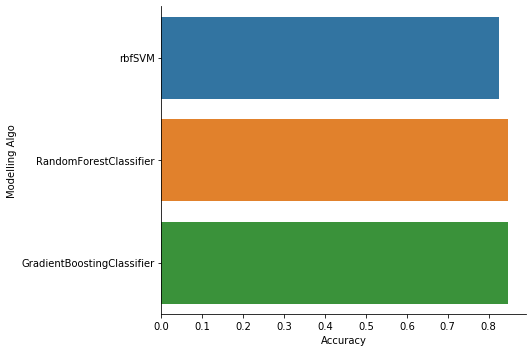

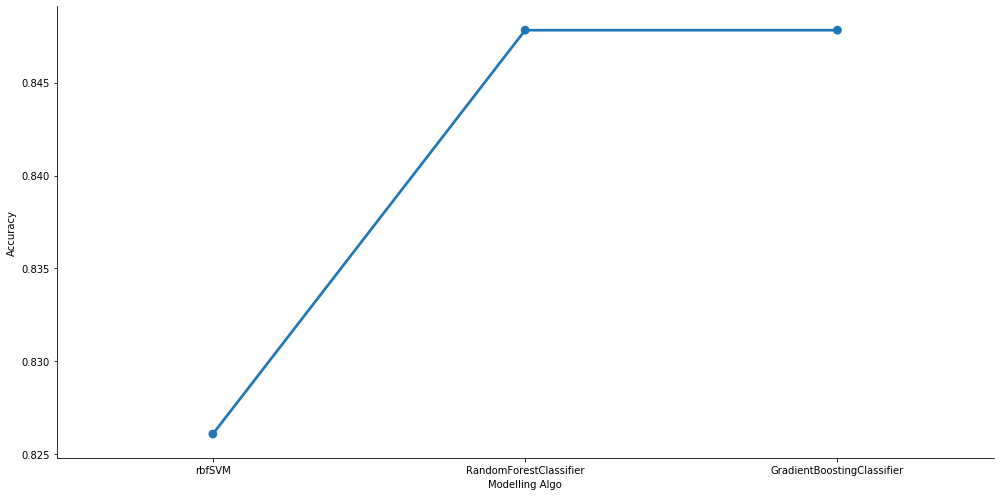

In [62]:
comp_models(met_df,'Accuracy')

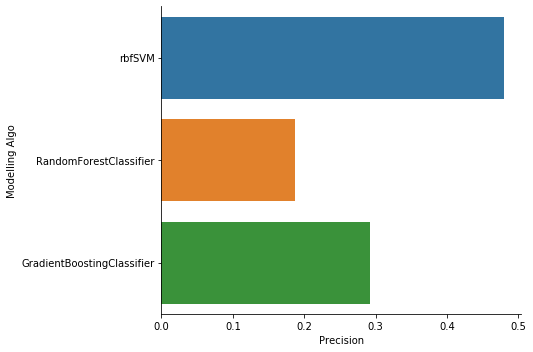

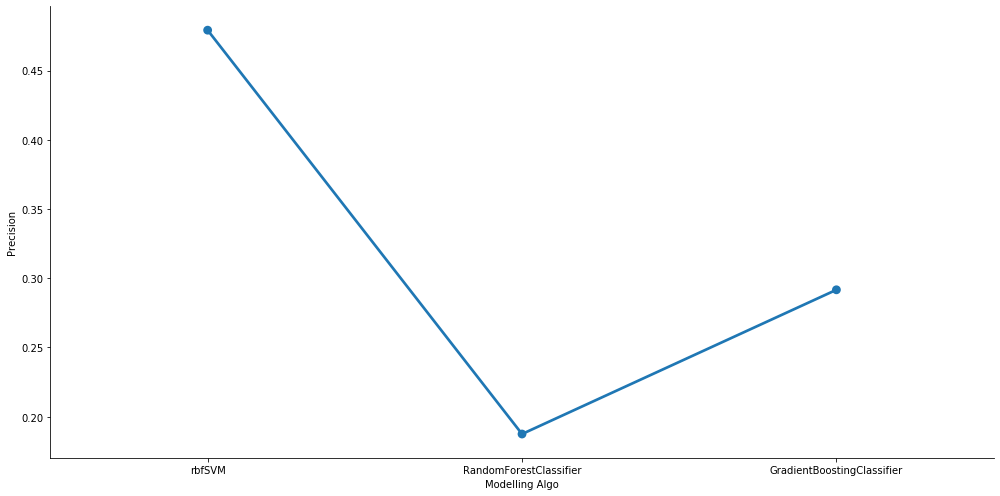

In [63]:
comp_models(met_df,'Precision')

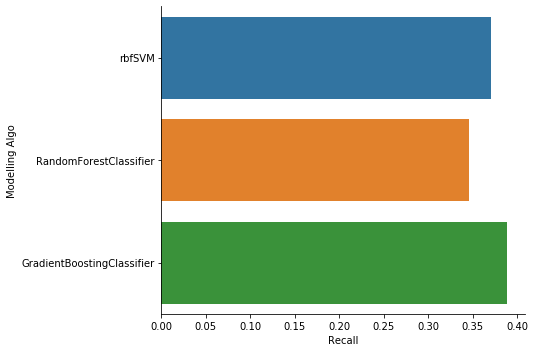

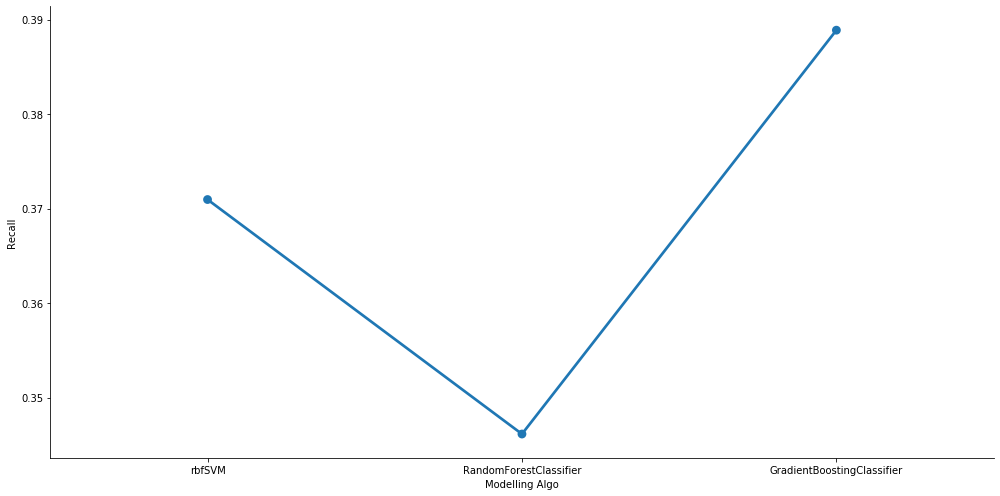

In [64]:
comp_models(met_df,'Recall')

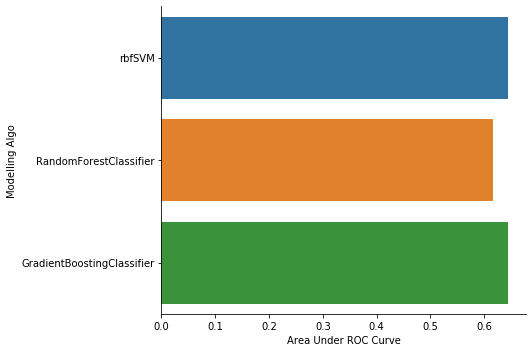

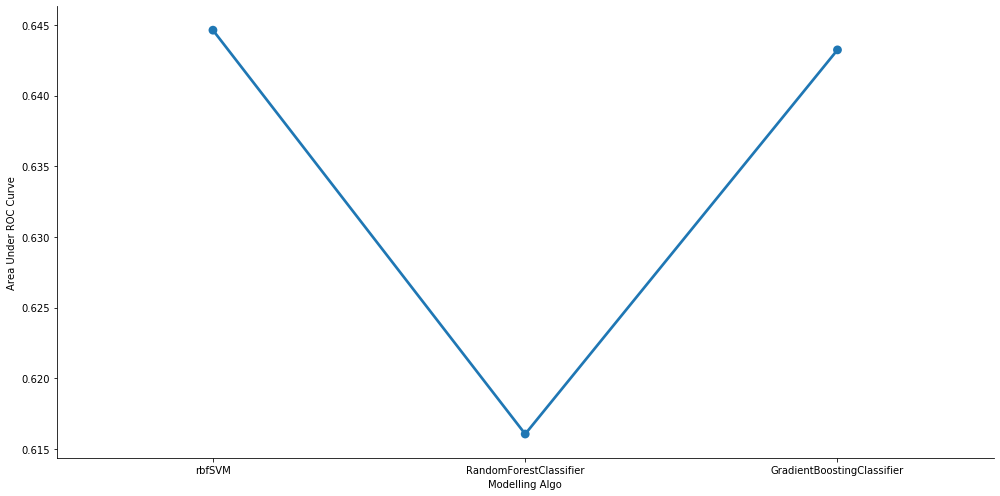

In [65]:
comp_models(met_df,'Area Under ROC Curve')

# Functions to visualize HYPERPARAMETER TRAINING 

In [56]:
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))

In [67]:
def model_performance_plot(model) : 
    #conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #plot roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False, 
                        subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance</b><br>'+str(model),
                        autosize = False, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [78]:
def features_imp(model, cf) : 

    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data     = pd.DataFrame(list(df))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    layout = dict(title =  'Feature Importances xgb_cfl')
                    
    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [70]:
def cum_gains_curve(model):
    pos = pd.get_dummies(y_test).as_matrix()
    pos = pos[:,1] 
    npos = np.sum(pos)
    index = np.argsort(y_score) 
    index = index[::-1] 
    sort_pos = pos[index]
    #cumulative sum
    cpos = np.cumsum(sort_pos) 
    #recall
    recall = cpos/npos 
    #size obs test
    n = y_test.shape[0] 
    size = np.arange(start=1,stop=369,step=1) 
    #proportion
    size = size / n 
    #plots
    model = 'xgb_cfl'
    trace1 = go.Scatter(x = size,y = recall,
                        name = "Lift curve",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace2 = go.Scatter(x = size,y = size,
                        name = "Baseline",
                        showlegend=False,
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))

    layout = dict(title = 'Cumulative gains curve'+' '+str(model),
                  yaxis = dict(title = 'Percentage positive targeted',zeroline = False),
                  xaxis = dict(title = 'Percentage contacted', zeroline = False)
                 )

    fig  = go.Figure(data = [trace1,trace2], layout = layout)
    py.iplot(fig)

# HYPERPARAMETRIZATION TUNING VIA RandomizedSearchCV

In [88]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)


# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [90]:
random_search

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=...
                   iid='warn', n_iter=800, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                   

In [72]:
xgb_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                           subsample=0.6)

xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)
y_score = xgb_clf.predict_proba(x_test)[:,1]

model_performance_plot('xgb_clf')

In [84]:
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

In [75]:
features_imp(xgb_clf, 'features')

In [80]:
cum_gains_curve(xgb_clf)